In [2]:
# the imports
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import datetime

In [1]:
# import all the important functions
from implementations import *
from helpers import *

In [3]:
#upload data
(labels, data, ids) = load_csv_data("C:/Users/remy/Documents/data/train.csv")  # load data

In [4]:
print(labels.shape)
print(data.shape)
print(ids.shape)

(250000,)
(250000, 30)
(250000,)


In [5]:
# set values of -999 to NaN. 
# Then calculate the means of the features. 
# Replace NaN values with new values.

data_process = np.array(data[:1000,:])
labels_select = np.array(labels[:1000])
lab = []
for entry in labels_select:
    if int(entry) == 1:
        lab.append(1)
    else:
        lab.append(0)
lab = np.array(lab)
data_process[data_process == -999] = np.nan

# print(data_process.shape)

In [6]:
# filter out really shitty features
# retrieve percentage for each feature 
# - how many nan's are there?

nan_count = []
for c in data_process.T:
    count = 0
    for e in c:
        if np.isnan(e):
            count += 1
    pcent = count / data_process.shape[0]
    nan_count.append(pcent)

In [7]:
# filter out features which have nan values of 50%

data_set_filtered = []
for idx, entry in enumerate(nan_count):
    if entry < 0.6:
        #append the column of the original dataset that is good
        data_set_filtered.append(data_process.T[idx]) 
#save that shit as an np array
data_set_filtered = np.array(data_set_filtered).T #save that shit as an np array

In [8]:
# filter out samples that have more than half of their features as nan (crappy samples)

nan_count_2 = []
data_set_filtered_2 = [] # dataset filtered for columns and samples
y = [] # array that gets rid of entries that are no longer corresponding in the dataframe
for sample in data_set_filtered:
    count = 0
    for col in sample:
        if np.isnan(col):
            count += 1
    pcent = count / data_set_filtered.shape[1]
    nan_count_2.append(pcent)

for idx, entry in enumerate(nan_count_2):
    if entry < 0.15:
        y.append(lab[idx])
        data_set_filtered_2.append(data_set_filtered[idx])
data_set_filtered_2 = np.array(data_set_filtered_2) # turn dat shit into an array
y = np.array(y) # also this one gotta be an array

In [9]:
# print new dimensions of the dataframe after filtering

print('The original dimensions of the training data set was {0} samples'
      ' and {1} columns. After feature and sample filtering, there are'
      ' {2} samples and {3} columns'.format(data_process.shape[0],
                                            data_process.shape[1],
                                            data_set_filtered_2.shape[0],
                                            data_set_filtered_2.shape[1]))


The original dimensions of the training data set was 1000 samples and 30 columns. After feature and sample filtering, there are 909 samples and 23 columns


In [10]:
# variable reassigned
data_nan = data_set_filtered_2.copy() 
# create list with average values of columns, excluding nans
column_means = [] 
for column in data_nan.T:
    column_means.append(np.nanmean(column))
    

# variable containing locations of nan in data frame
inds = np.where(np.isnan(data_nan)) 
# reassign locations of nan to the column means
data_nan[inds] = np.take(column_means, inds[1]) 

In [11]:
# standardize and normalize the features
column_variance = []
for idx, column in enumerate(data_nan.T):
    mean = np.mean(column)
    variance = np.var(column)
    for entry, value in enumerate(column):
        data_nan[entry, idx] = (value - mean)/variance

In [12]:
# COMPRESS DATA BY PCA. Note that this is an unsupervised method and might not be a good alternative

# pca_ = pca(percent_rep=0.9)
# pca_.fit(data_nan)
# pca_data = pca_.transform(data_nan)
#
# pca_data_A = []
# pca_data_B = []
# for idx, entry in enumerate(labels_select):
#     if entry == 1:
#         pca_data_A.append(pca_data[idx])
#     else:
#         pca_data_B.append(pca_data[idx])
# pca_data_A = np.array(pca_data_A)
# pca_data_B = np.array(pca_data_B)
#
# fig = plt.figure()
# scattered = plt.axes(projection = '3d')
# scattered.scatter3D(pca_data_A[:,0], pca_data_A[:,1], pca_data_A[:,2], c='blue')
# scattered.scatter3D(pca_data_B[:,0], pca_data_B[:,1], pca_data_B[:,2], c='red')
#
# plt.show()
# pca_int = logreg.add_int(pca_data)
# prediction = logreg.predict_class(pca_int)
# print(prediction)

# add some non-linear variants of each of the features that are included in the data set
# do this by constructing a new array, which will then be concatenated with the old one
# note that the addition of the squared features increases accuracy by a few percentage
# but there is a smaller, but clear, difference with the cubed features


In [13]:
# concatenate_me = []

# for col in data_nan.T:
#     col_squared = [entry**2 for entry in col]
#     col_cubed = [entry ** 3 for entry in col]
#     concatenate_me.append(col_squared)
#     concatenate_me.append(col_cubed)

# concatenate_me = np.array(concatenate_me).T
# data_concatenated = np.concatenate((data_nan, concatenate_me), axis=1)

In [14]:
data_nan.shape


(909, 23)

In [ ]:
%load_ext autoreload
%autoreload 2






In [35]:
# perform the linear regression
# i just noticed that the prediction accuracy also depends quite a bit on the initialized w.
# for example if you initialize them all to ones instead of zeros, accuracy increases. overfitting?



logreg_SGD = LogisticRegression(writing=True)
accuracy_SGD, loss_SGD = logreg_SGD.fit(data_nan, y,"sgd")

logreg_GD = LogisticRegression(writing=True)
accuracy_GD, loss_GD = logreg.fit(data_nan, y,"gd")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\remy\Documents\machine_learning\project_1\implementations.py:155: RuntimeWarning: divide by zero encountered in log
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
C:\Users\remy\Documents\machine_learning\project_1\implementations.py:155: RuntimeWarning: invalid value encountered in multiply
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


iteration: 0 | accuracy : 0.43471479500891264, loss : nan
iteration: 500 | accuracy : 0.5934714795008913, loss : 1.0892098101847942
iteration: 1000 | accuracy : 0.6281194295900179, loss : 0.7670669352752669
iteration: 1500 | accuracy : 0.670120320855615, loss : nan
iteration: 2000 | accuracy : 0.6720142602495544, loss : 0.6401741389912253
iteration: 2500 | accuracy : 0.6915106951871658, loss : nan
iteration: 3000 | accuracy : 0.6946301247771836, loss : 0.5842166790386295
iteration: 3500 | accuracy : 0.7004233511586453, loss : 0.5772469895126368
iteration: 4000 | accuracy : 0.7027629233511586, loss : 0.5750838187532412
iteration: 4500 | accuracy : 0.6878342245989305, loss : inf
iteration: 5000 | accuracy : 0.7030971479500892, loss : nan
iteration: 5500 | accuracy : 0.7039884135472371, loss : nan
iteration: 6000 | accuracy : 0.7090017825311943, loss : 0.567219663628794
iteration: 6500 | accuracy : 0.7092245989304813, loss : 0.5657530935181705
iteration: 7000 | accuracy : 0.70744206773618

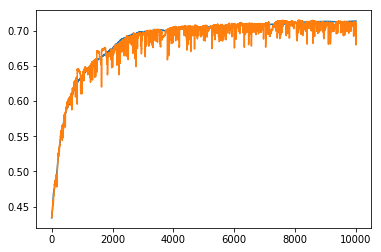

In [36]:
plt.plot(accuracy_GD)
plt.plot(accuracy_SGD)


In [25]:
# SPLIT DATA

#(X_train, y_train, X_test, y_test) = test_train(data, labels, test_ratio=0.3)  # split into train and test set


np.set_printoptions(precision=3)
np.set_printoptions(threshold=np.nan)

# # CALCULATE FISHER SCORE VARIANT
#
# scores = []
# means_A = []
# var_A = []
# means_B = []
# var_B = []
# class_A = np.array(data_nan[np.argwhere(y == 1)])# separate out classes
# class_A = class_A[:,0,:]
# class_B = np.array(data_nan[np.argwhere(y == 0)])
# class_B = class_B[:,0,:]
#
# for c in class_A.T:
#     means_A.append(np.mean(c))
#     var_A.append(np.var(c))
# for c in class_B.T:
#     means_B.append(np.mean(c))
#     var_B.append(np.mean(c))
# for x in range(len(means_A)):
#     scores.append(means_A[x] - means_B[x]) # score function
# print(np.array(scores))
#
#
# # fig = plt.figure()
# # scattered = plt.axes(projection = '3d')
# # scattered.scatter3D(class_A[:,12], class_A[:,28], class_A[:,4], c='blue')
# # scattered.scatter3D(class_B[:,12], class_B[:,28], class_B[:,4], c='red')
# fig = plt.figure()
# plt.scatter(class_B[:,12], class_B[:,10], c='blue', alpha=0.2)
# plt.scatter(class_A[:,12], class_A[:,10], c='red', alpha=0.2)
#
# plt.show()
